Heart Disease Classification Model
- if we finish early then we can add other illnesses

Type of model?
- logistic regression
- decision trees
- neural networks
- GBM
- Random Forest


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandasql import sqldf
from keras.models import Sequential #Neural Model using Keras
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleveland-clinic-heart-disease-dataset/processed_cleveland.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/cleveland-clinic-heart-disease-dataset/processed_cleveland.csv')

# Cleaning the data
cleaning = lambda q: sqldf(q, globals())
dataset = dataset.replace('?', np.nan)
dataset = dataset.dropna()
dataset['num'] = dataset['num'].apply(lambda x: 1 if x > 0 else 0)
# Replace '?' with NULL
query = """
SELECT 
    *, 
    CASE WHEN num = '?' THEN NULL ELSE num END as new_num
FROM 
    dataset
"""
dataset = cleaning(query)

# Drop rows with NULL values
query = """
SELECT 
    *
FROM 
    dataset
WHERE 
    new_num IS NOT NULL
"""
dataset = cleaning(query)

# Convert 'num' column to binary format
query = """
SELECT 
    *, 
    CASE WHEN new_num > 0 THEN 1 ELSE 0 END as final_num
FROM 
    dataset
"""
dataset = cleaning(query)

In [3]:
nRow, nCol = dataset.shape
print(f'{nRow} rows and {nCol} columns')


297 rows and 16 columns


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 91.67


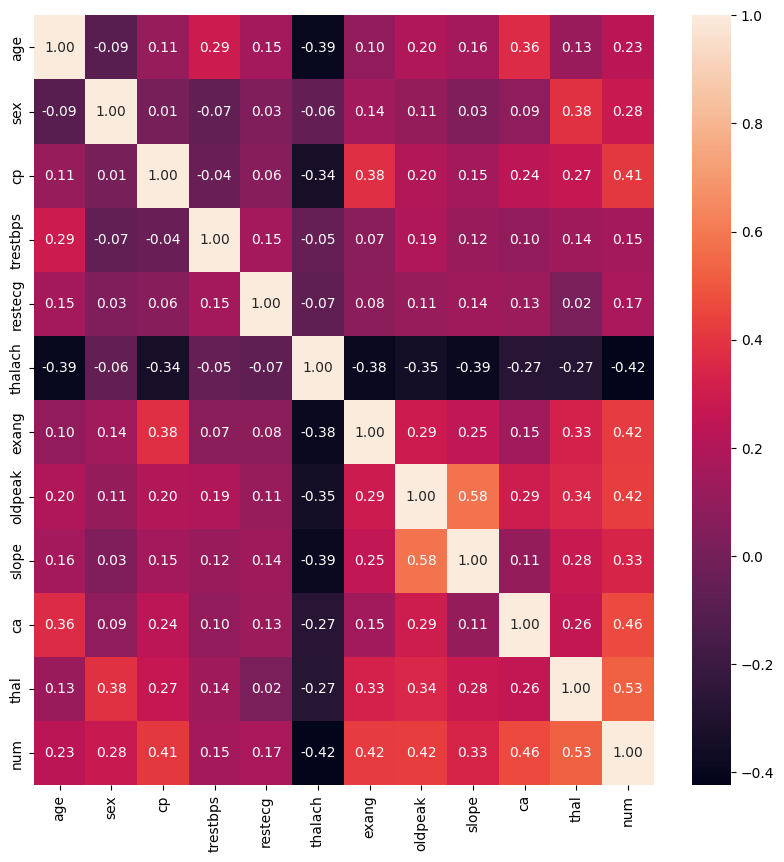

In [4]:
#Using Scikit
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target
features = ['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = ['num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=100)

# Train the model
model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = dataset[features + target].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()